In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
ids2018_results = pd.read_csv(
    "ids2018/deepsvdd/deepsvdd_misclassifications.csv",
    index_col=0
)
ids2018_results = ids2018_results.sort_index()
ids2018_results

,# Instances test set,Misclassified count,Misclassified ratio,Accuracy
Benign,6742346,1167421,0.173148,0.826852
Bot,286191,145142,0.507151,0.492849
DDoS,1263933,559054,0.442313,0.557687
DoS,654300,22192,0.033917,0.966083
FTP-BruteForce,193360,18845,0.097461,0.902539
Infiltration,161934,129410,0.799153,0.200847
SSH-Bruteforce,187589,2,0.000011,0.999989
Web Attack,928,383,0.412716,0.587284


In [25]:
ids2017_results = pd.read_csv(
    "ids2017/deepsvdd_experiments/deepsvdd_misclassifications.csv",
    index_col=0
)
ids2017_results = ids2017_results.rename(index={"BENIGN": "Benign", "SSH-Patator": "SSH-Bruteforce", "FTP-Patator": "FTP-BruteForce"})

ids2017_results = ids2017_results.drop(index=["Heartbleed", "PortScan"]).sort_index()
ids2017_results

,# Instances test set,Misclassified count,Misclassified ratio,Accuracy
Benign,1136374,172471,0.151773,0.848227
Bot,1966,1854,0.943032,0.056968
DDoS,128027,7312,0.057113,0.942887
DoS,252658,72053,0.285180,0.714820
FTP-BruteForce,7938,7835,0.987024,0.012976
Infiltration,36,3,0.083333,0.916667
SSH-Bruteforce,5897,5889,0.998643,0.001357
Web Attack,2180,2075,0.951835,0.048165


In [27]:
# Sanity check
for y_ids2018, y_ids2017 in zip(ids2018_results.index, ids2017_results.index):
    if y_ids2018 != y_ids2017:
        print("{} != {}".format(y_ids2018, y_ids2017))

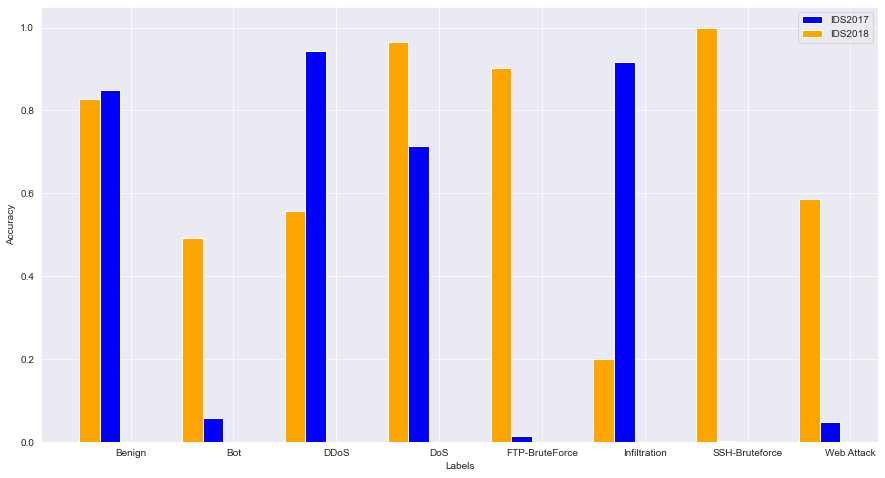

In [28]:
# create data
x = np.arange(len(ids2018_results.index))
y1 = ids2017_results["Accuracy"]
y2 = ids2018_results["Accuracy"]
width = 0.2

f, ax = plt.subplots(figsize=(15, 8))
# plot data in grouped manner of bar type
ax.bar(x - 0.2, y1, width, color="blue")
ax.bar(x - 0.4, y2, width, color="orange")

plt.xticks(x, ids2018_results.index)
plt.xlabel("Labels")
plt.ylabel("Accuracy")
plt.legend(["IDS2017", "IDS2018"])
plt.show()